## Distributions in Machine Learning

### Uniform Distribution

The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain:

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
u = np.random.uniform(size = 10000)
u

array([0.58943283, 0.06180314, 0.74896704, ..., 0.55196798, 0.08661289,
       0.69879172], shape=(10000,))

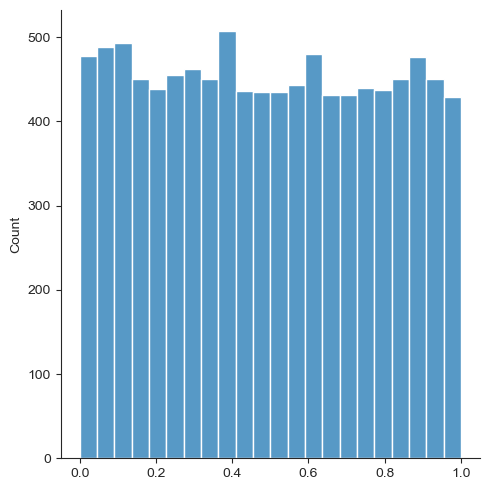

In [3]:
sns.set_style('ticks')
_ = sns.displot(x = u)

#### Real world example includes:

* Dice rolling (PMF)
* Card drawing (PMF)
* Model hyperparameters
* Emission of radioactive particles
* Economic demand
* Analog-to-digital signal quantization errors

### Gaussian

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**:

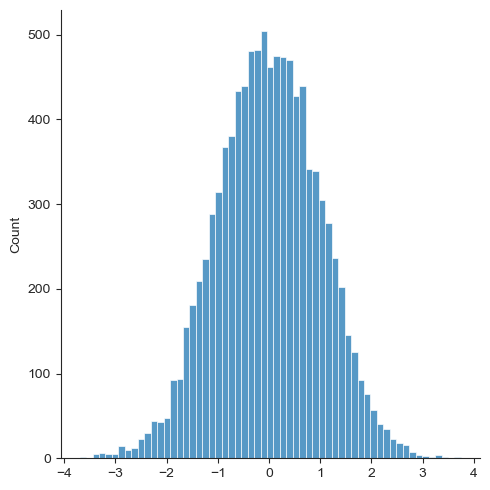

In [4]:
x = np.random.normal(size=10000)
_ = sns.displot(x = x)

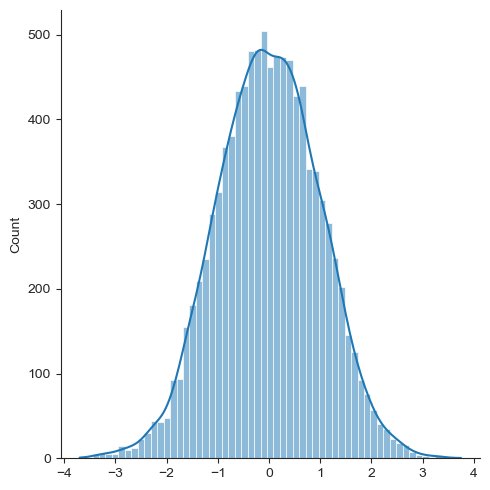

In [ ]:
# KDE - Kernel Density Estimation - smoothing the data using a kernel function 

_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [6]:
np.mean(x)

np.float64(-0.009606626894500288)

In [7]:
np.std(x)

np.float64(0.9964248983345582)

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math calligraphy* font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$.

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

---

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

---

Real-world examples include:

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT




In [8]:
n_experiments = 10000
head_counts = [np.random.binomial(100, 0.5) for _ in range(n_experiments)]
heads, event_count = np.unique(head_counts, return_counts=True)
event_prob = event_count / n_experiments

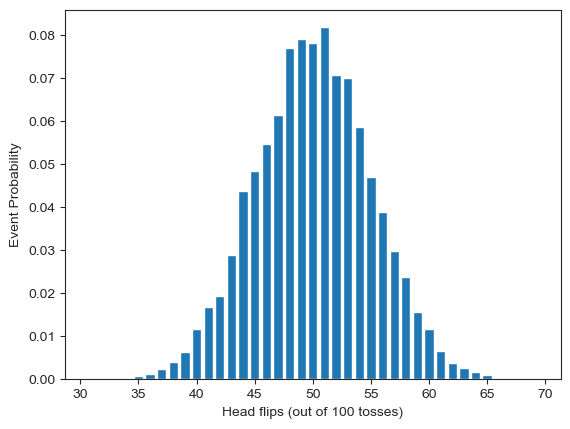

In [9]:
plt.bar(heads, event_prob)
_ = plt.xlabel("Head flips (out of 100 tosses)")
_ = plt.ylabel("Event Probability")

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [10]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 1.0165826 , -0.1266288 ,  1.3226568 ,  0.79352117,  0.337372  ,
       -0.30955759,  0.44629068, -1.48039323, -0.49573773,  0.72621857])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [11]:
np.mean(x_sample)

np.float64(0.2230324474500142)

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [12]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for _ in range(n_samples):
        sample  = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

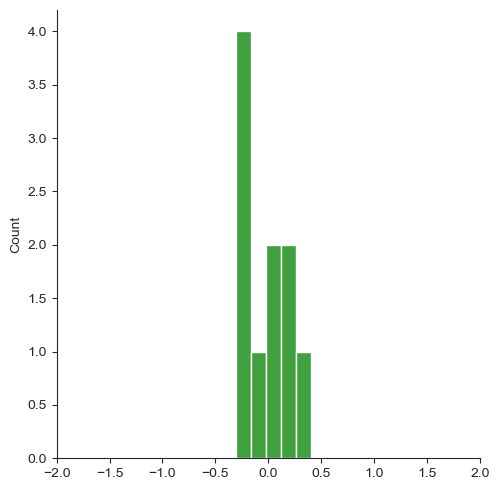

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed:

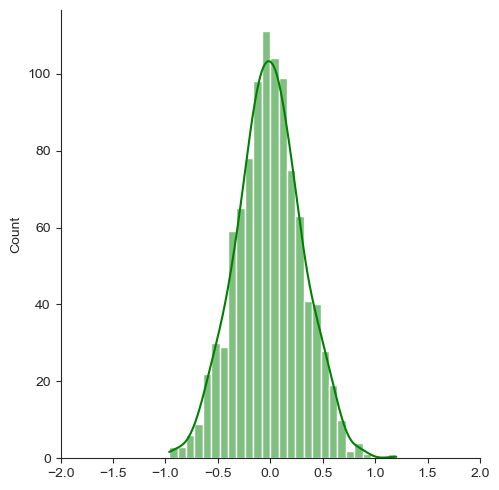

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

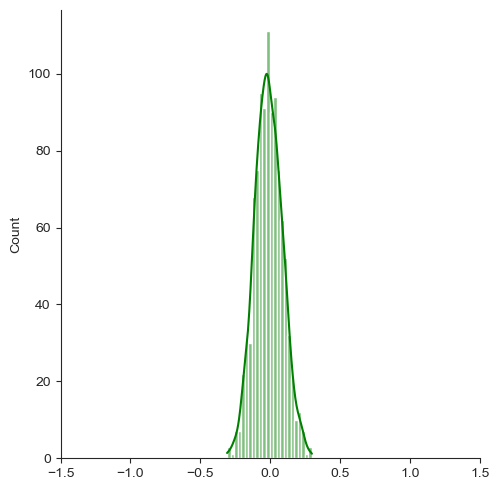

In [15]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

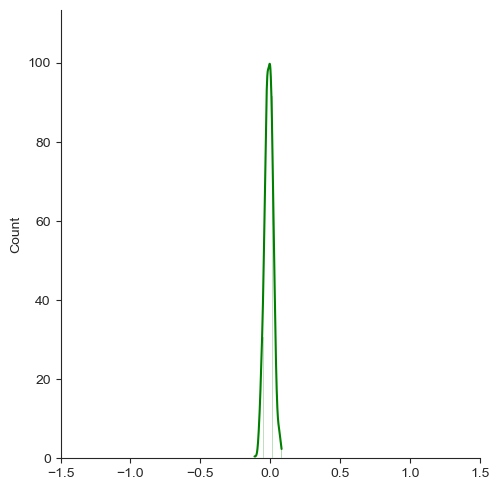

In [16]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

skewed distribution as well when sampled will turn out to be close to normal distribution

In [17]:
s = st.skewnorm.rvs(10, size=10000)

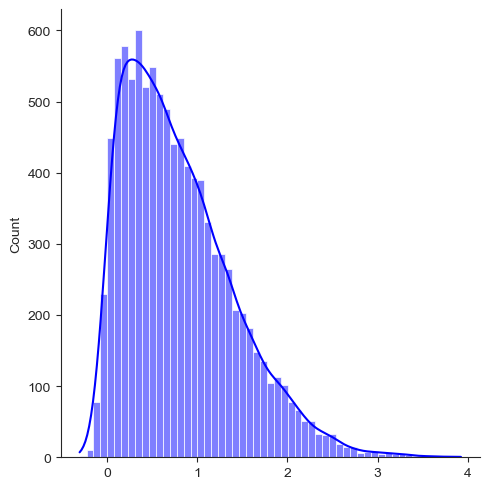

In [18]:
sns.displot(s, color='blue', kde=True)

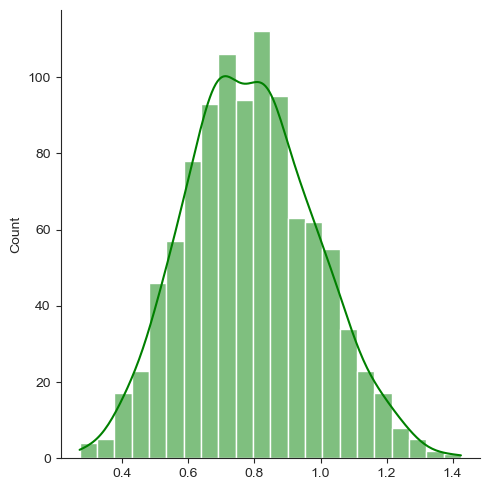

In [19]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

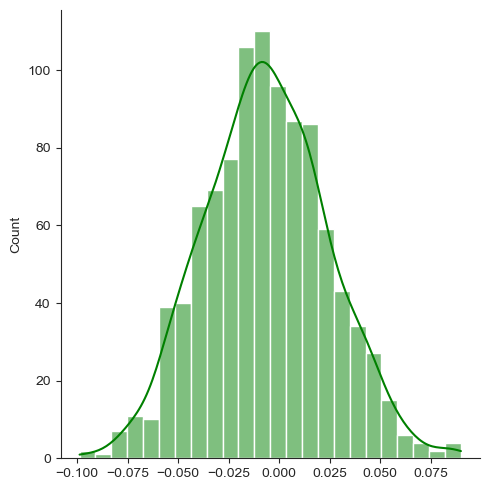

In [20]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

Let us see this distribution which has 2 different normal distribution

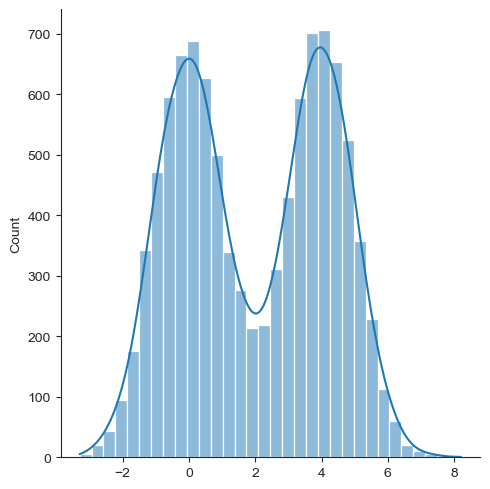

In [23]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc=4, size=5000)))
_ = sns.displot(m, kde=True)

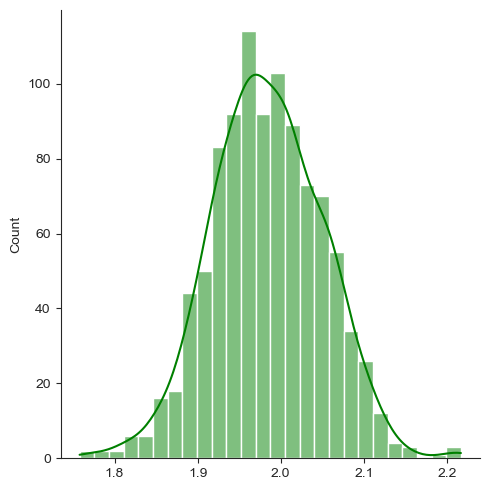

In [24]:
sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

Again it turns out to be normally distributed around mean of 2, which is the average of the both the distribution

#### Sampling from Unifrom distribution

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal:

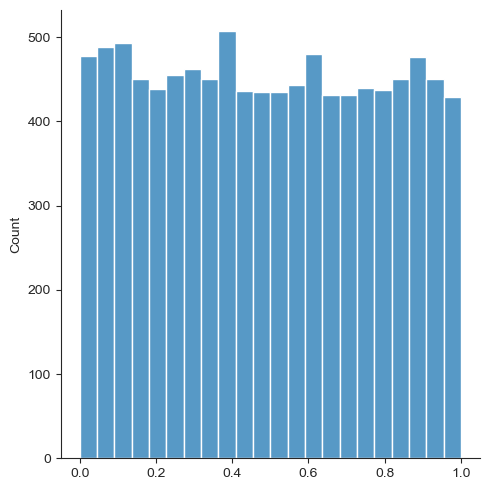

In [26]:
_ = sns.displot(u)

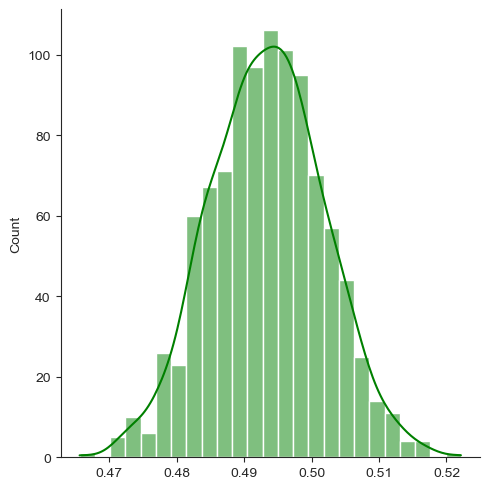

In [27]:
sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

(Despite being associated with such a key concept as the CLT, the name "normal distribution" wasn't originally intended to imply that other distributions are "abnormal". It's a historical quirk related to Gauss describing orthogonal (technically a.k.a. "normal") equations associated with applied uses of the distribution.)

(Finally, you may wonder what the purpose of sampling means is! Well, when we gather data from the real world we are nearly always sampling a subset of all the available data produced by a given random process. And, once we've collected a sample of data, the aspect of it we're often most interested in above all else is its mean.)